In [1]:
# импортируем библиотеку для визаулизации данных
import matplotlib.pyplot as plt
# импортируем библиотеку для базовых математических расчетов
import math
print('Анюшина Мария')

Анюшина Мария


In [146]:
# Размеры образца, которые нам понадобятся позднее
b0 = 11 # ширина образца по ISO 6892-1:2019
L0 = 50 # начальная длина образца по ISO 6892-1:2019
a0 = 5 # тольщина образца по исходным данным

In [147]:
stroke = [] # пустой список для записи данных о перемещении
load = []   # пустой список для записи данных о силе

# открываем файл с данными
with open('Образец 1_Норм скор_Комн темп.txt', 'r') as file:
    next(file)  # Пропускаем первую строку (заголовок)
    for line in file:
        stroke_load = line.split('\t')
        stroke.append(float(stroke_load[0])) # Первый элемент - перемещение
        load.append(float(stroke_load[1]))   # Второй элемент - нагрузка

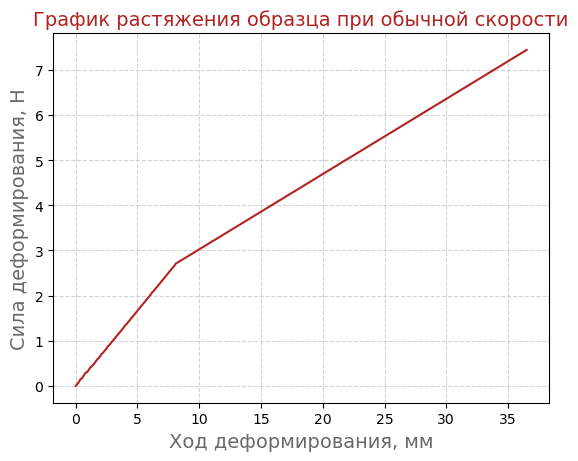

In [148]:
# визуализируем данные с помощью импортированной ранее библиотеки matplotlib

# создаем "базу" для графика
plt.plot (stroke, load, '-', color = 'firebrick')
# Добавляем названия осей
plt.title ('График растяжения образца при обычной скорости',fontsize = 14, color='firebrick')
plt.xlabel ('Ход деформирования, мм', fontsize = 14, color='dimgrey')
plt.ylabel ('Сила деформирования, Н', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid(color='lightgray', linestyle='--')

In [149]:
# Расчет инженерного напряжения
A0 = math.pi*(a0**2)/4  # расчет площади поперечного сечения образца

sigma_eng = [] # пустой список куда будем записывать значения инженерного напряжения
for i in range (0, len(load)):
    sigma_eng.append(load[i]/A0)

In [150]:
# Расчет инженерной деформации
epsilon_eng = [] # пустой список куда будем записывать значения инженерной деформации
for i in range (0, len(stroke)):
    epsilon_eng.append((stroke[i]/L0)*100)

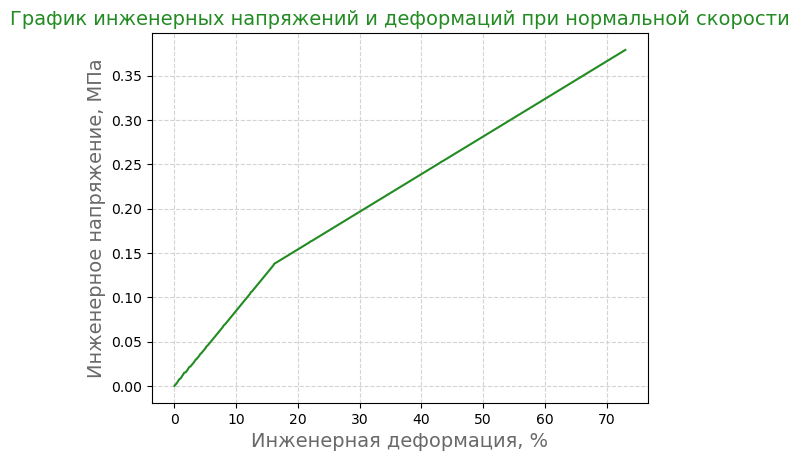

In [151]:
# Визуализируем результаты
# создаем "базу" для графика
plt.plot (epsilon_eng, sigma_eng, '-', color='forestgreen')
# Добавляем названия осей
plt.title ('График инженерных напряжений и деформаций при нормальной скорости',fontsize = 14, color='forestgreen')
plt.xlabel ('Инженерная деформация, %', fontsize = 14, color='dimgrey')
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14, color='dimgrey')

# добавляем для красоты сетку
plt.grid(color='lightgray', linestyle='--')

In [152]:
# Расчет истинного напряжения и деформации
sigma_true = [] # пустой список куда будем записывать значения истинного напряжения
epsilon_true = [] # пустой список куда будем записывать значения истинной деформации
for i in range (0, len(sigma_eng)):
    sigma_true.append(sigma_eng[i]*(1+epsilon_eng[i]/100))
    epsilon_true.append(math.log(1+epsilon_eng[i]/100))

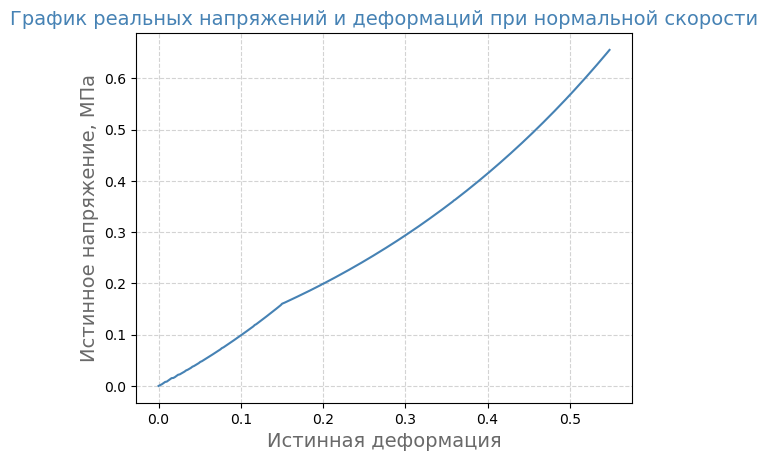

In [153]:
# Визуализируем результаты
# создаем "базу" для график
plt.plot (epsilon_true, sigma_true, '-', color = 'steelblue')
# Добавляем названия осей
plt.title ('График реальных напряжений и деформаций при нормальной скорости',fontsize = 14, color='steelblue')
plt.xlabel ('Истинная деформация', fontsize = 14, color='dimgrey')
plt.ylabel ('Истинное напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid(color='lightgray', linestyle='--')

In [154]:
# Поиск предела прочности (максимального значения инженерного напряжения)
Rm = sigma_eng[0]  # Начальное значение - первое значение массива
i_m = 0            # Начальный индекс

for i in range(1, len(sigma_eng)):
    if sigma_eng[i] > Rm:
        Rm = sigma_eng[i]
        i_m = i  # номер строки в массиве данных, которому соответствует предел прочности

print(f'Предел прочности Rm = {round(Rm, 3)} МПа, при i = {i_m}')

Предел прочности Rm = 0.379 МПа, при i = 365


In [155]:
# Расчет равномерного удлинния
E = 72000 # модуль Юнга для алюминия принято брать 72 000 МПа
Ag = epsilon_eng[i_m] - (Rm/E)*100
print (f'Равномерное удлинение Ag = {round(Ag,3)}%')

Равномерное удлинение Ag = 72.999%


In [156]:
#построение графиков для испытаний проведенных при повышенных скоростях 


In [157]:
stroke_p = [] # пустой список для записи данных о перемещении
load_p = [] # пустой список для записи данных о силе

# открываем файл с данными
with open ('Образец 2_Повыш скор_Комн темп.txt', 'r') as file: # 'r' означает, что файл мы октрываем для чения
    for line in file:                                    # для каждой строки в файле мы выполняем следующие действия
        stroke_load_p = line.split('\t')                   # разделяем строку по табуляции (можно было ничего не писать в скобках 
                                                         # и разделение было бы по любым пробелам). Получаем временный список из двух чисел
        stroke_p.append(float(stroke_load_p[1]))             # первое число добавляем в список stroke
        load_p.append(float(stroke_load_p[2]))               # второе число в список load

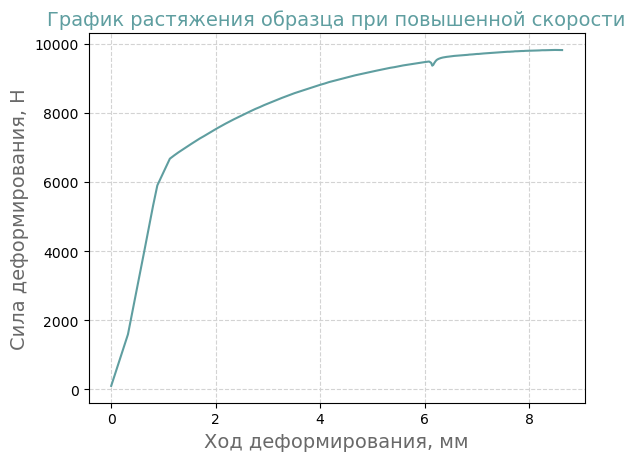

In [158]:
# визуализируем данные с помощью импортированной ранее библиотеки matplotlib

# создаем "базу" для графика
plt.plot (stroke_p, load_p, '-', color = 'cadetblue')
# Добавляем названия осей
plt.title ('График растяжения образца при повышенной скорости',fontsize = 14, color='cadetblue')
plt.xlabel ('Ход деформирования, мм', fontsize = 14, color='dimgrey')
plt.ylabel ('Сила деформирования, Н', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid(color='lightgray', linestyle='--')

In [159]:
# Расчет инженерного напряжения
A0 = math.pi*(a0**2)/4  # расчет площади поперечного сечения образца

sigma_eng_p = [] # пустой список куда будем записывать значения инженерного напряжения
for i in range (0, len(load_p)):
    sigma_eng_p.append(load_p[i]/A0)

In [160]:
# Расчет инженерной деформации
epsilon_eng_p = [] # пустой список куда будем записывать значения инженерной деформации
for i in range (0, len(stroke_p)):
    epsilon_eng_p.append((stroke_p[i]/L0)*100)

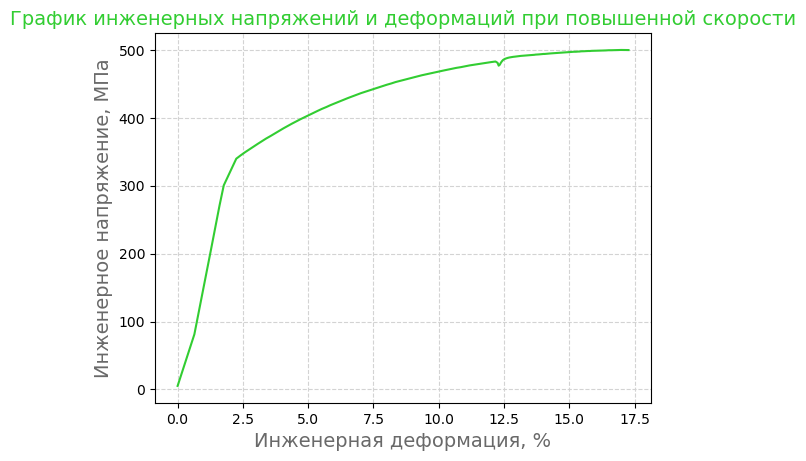

In [161]:
# Визуализируем результаты
# создаем "базу" для графика
plt.plot (epsilon_eng_p, sigma_eng_p, '-', color='limegreen')
# Добавляем названия осей
plt.title ('График инженерных напряжений и деформаций при повышенной скорости',fontsize = 14, color='limegreen')
plt.xlabel ('Инженерная деформация, %', fontsize = 14, color='dimgrey')
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid(color='lightgray', linestyle='--')

In [162]:
# Расчет истинного напряжения и деформации
sigma_true_p = [] # пустой список куда будем записывать значения истинного напряжения
epsilon_true_p = [] # пустой список куда будем записывать значения истинной деформации
for i in range (0, len(sigma_eng_p)):
    sigma_true_p.append(sigma_eng_p[i]*(1+epsilon_eng_p[i]/100))
    epsilon_true_p.append(math.log(1+epsilon_eng_p[i]/100))

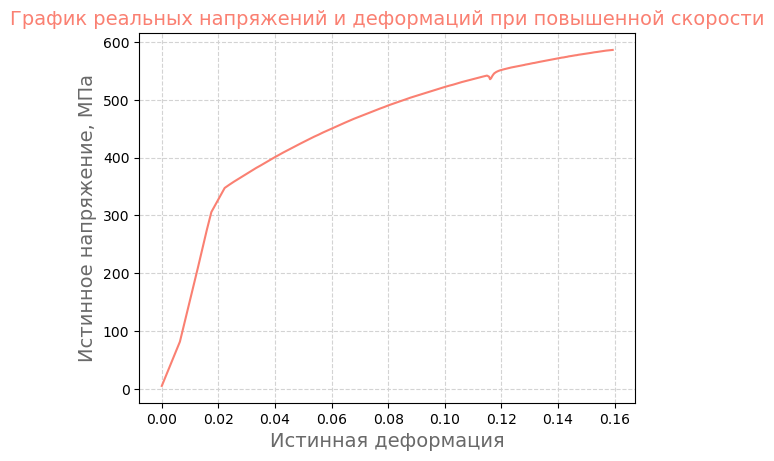

In [163]:
# Визуализируем результаты
# создаем "базу" для график
plt.plot (epsilon_true_p, sigma_true_p, '-', color = 'salmon')
# Добавляем названия осей
plt.title ('График реальных напряжений и деформаций при повышенной скорости',fontsize = 14, color='salmon')
plt.xlabel ('Истинная деформация', fontsize = 14, color='dimgrey')
plt.ylabel ('Истинное напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем для красоты сетку
plt.grid(color='lightgray', linestyle='--')

In [164]:
# Поиск предла прочности (максимального значения инженерного напряжения)
Rmp = 0 # начальное значение переменной, которая будет хранить предел прочности
for i in range (1, len(sigma_eng_p)):
    if sigma_eng_p[i] > Rmp:
        Rmp = sigma_eng_p[i]
        i_m_p = i # номер строки в массиве данных, которому соответсвует предел прочности (эта переменная нам понадобится позже)
print (f'Предел прочности Rmp = {round(Rmp, 3)} МПа, при i = {i_m_p}')

Предел прочности Rmp = 500.179 МПа, при i = 197


In [165]:
# Расчет равномерного удлинния
E = 72000 # модуль Юнга для алюминия принято брать 72 000 МПа
Ag = epsilon_eng_p[i_m_p] - (Rmp/E)*100
print (f'Равномерное удлинение Ag = {round(Ag,3)}%')

Равномерное удлинение Ag = 16.364%


In [166]:
#Построение общей диаграммы 

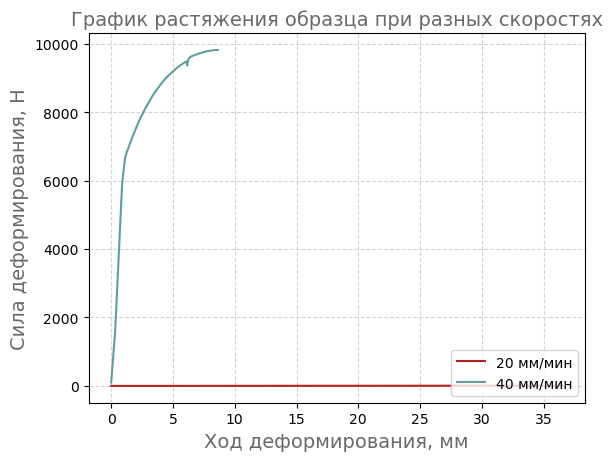

In [167]:
# визуализируем данные с помощью импортированной ранее библиотеки matplotlib

# создаем "базу" для графика
plt.plot (stroke, load, '-', color = 'firebrick', label='20 мм/мин')

plt.plot (stroke_p, load_p, '-', color = 'cadetblue', label='40 мм/мин')

# Добавляем названия осей
plt.title ('График растяжения образца при разных скоростях',fontsize = 14, color='dimgray')
plt.xlabel ('Ход деформирования, мм', fontsize = 14, color='dimgrey')
plt.ylabel ('Сила деформирования, Н', fontsize = 14, color='dimgrey')
# добавляем сетку

plt.grid(color='lightgray', linestyle='--')
plt.legend(loc='lower right')

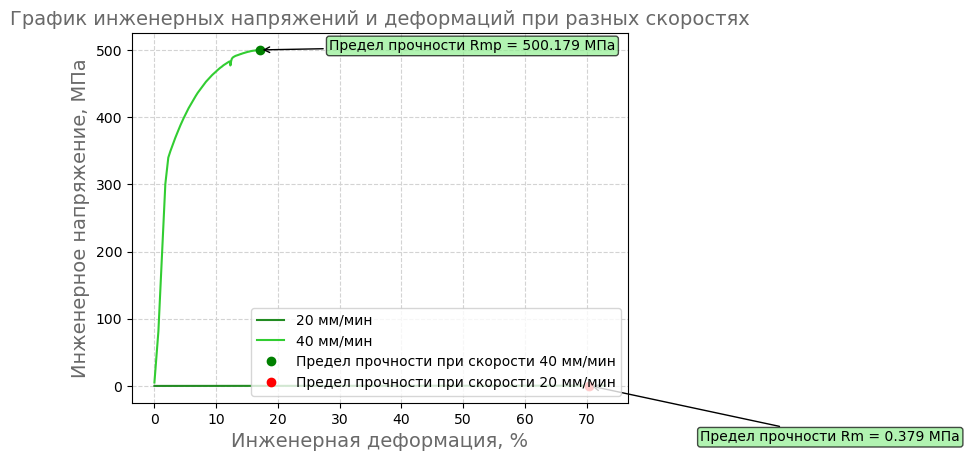

In [168]:
plt.plot (epsilon_eng, sigma_eng, '-', color='forestgreen', label='20 мм/мин')
plt.plot (epsilon_eng_p, sigma_eng_p, '-', color='limegreen', label='40 мм/мин')
# Добавляем названия осей
plt.title ('График инженерных напряжений и деформаций при разных скоростях',fontsize = 14, color='dimgrey')
plt.xlabel ('Инженерная деформация, %', fontsize = 14, color='dimgrey')
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.plot(epsilon_eng_p[197], sigma_eng_p[197], 'go', markersize=6, label='Предел прочности при скорости 40 мм/мин')
plt.plot(epsilon_eng[352], sigma_eng[352], 'ro',markersize=6, label='Предел прочности при скорости 20 мм/мин')
plt.grid(color='lightgray', linestyle='--')
# Аннотация

plt.annotate(f'Предел прочности Rm = {round(Rm, 3)} МПа', 
           xy=(epsilon_eng[352],  sigma_eng[352]),
           xytext=(80, -40),
           textcoords='offset points',
           bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.7),
           arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Предел прочности Rmp = {round(Rmp, 3)} МПа', 
           xy=(epsilon_eng_p[197], sigma_eng_p[197]),
           xytext=(50, 0),
           textcoords='offset points',
           bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.7),
           arrowprops=dict(arrowstyle='->'))

plt.legend(loc='lower right')

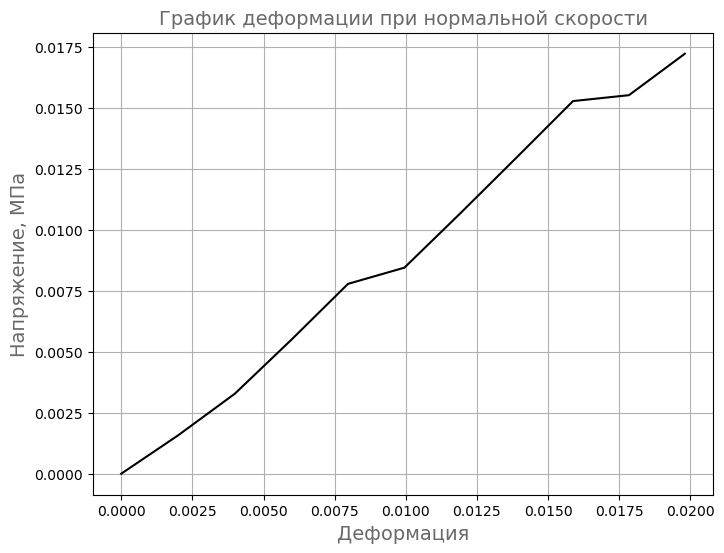

In [169]:
elastic_limit = 0.02 # условно примем, что упругая зона расположена слева от точки 0.02 (2%) по оси деформации
strain_elastic_plastic = [0] # пустой список, куда будем записывать упруго-пластические деформации
stress_elastic_plastic = [0] # пустой список, куда будем записывать упруго-пластические напряжения

for i in range(1, len(epsilon_true)):
    if epsilon_true[i] <= elastic_limit:
        strain_elastic_plastic.append(epsilon_true[i])
        stress_elastic_plastic.append(sigma_true[i])
    else: break

# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (strain_elastic_plastic, stress_elastic_plastic, '-', color = 'black')
# Добавляем названия осей
plt.title ('График деформации при нормальной скорости',fontsize = 14, color='dimgrey')
plt.xlabel ('Деформация', fontsize = 14, color='dimgrey')
plt.ylabel ('Напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid()

In [170]:
numerator = 0.0 # сюда будем накапливать сумму в числителе
denominator = 0.0 # сюда в знаминателе
i=0
while epsilon_true[i] <= 0.02  :
    sigma = sigma_true[i]
    epsilon = epsilon_true[i]
    numerator += sigma * epsilon
    denominator += epsilon * epsilon
    i+=1

if denominator != 0:
    E = numerator / denominator
else:
    E = 0
print (f'Модуль Юнга = {E}, МПа')

Модуль Юнга = 0.8986073448177626, МПа


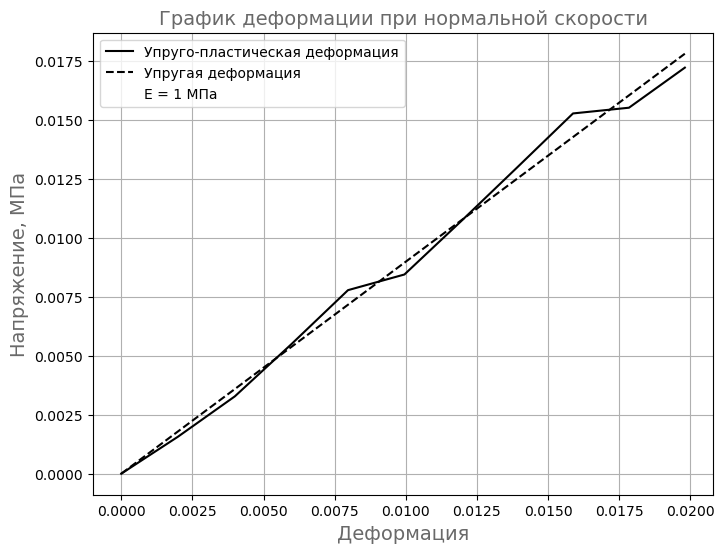

In [171]:
# Определяем график упругой деформации
stress_elastic = [0]
strain_elastic = [0]
i=0
while epsilon_true[i] <= elastic_limit:
    strain_elastic.append(epsilon_true[i])
    stress_elastic.append(E*epsilon_true[i])
    i+=1
# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (strain_elastic_plastic, stress_elastic_plastic, '-', color = 'black', label = 'Упруго-пластическая деформация')
plt.plot (strain_elastic, stress_elastic, '--', color = 'black', label = 'Упругая деформация')
plt.plot ([], [], ' ', label = f'E = {round(E)} МПа')
# Добавляем названия осей
plt.title ('График деформации при нормальной скорости',fontsize = 14, color='dimgrey')
plt.xlabel ('Деформация', fontsize = 14, color='dimgrey')
plt.ylabel ('Напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid()
# добавляем название каждой кривой
plt.legend()

In [172]:
# Предел текучести материала ищем из расчета, что остаточная пластическая деформация в этой точке равна 0.2% или 0.002
yield_stress = 0
plastic_strain = 0
i = 0
elastic_limit = 0.002  # Убедитесь, что эта переменная определена!

# Добавляем проверку, чтобы индекс i не выходил за границы массива
while i < len(epsilon_true) and plastic_strain <= elastic_limit:
    plastic_strain = epsilon_true[i] - sigma_true[i] / E
    yield_stress = sigma_true[i]
    i += 1
    i_s = i

print(f'Предел текучести = {yield_stress} МПа')
print(f'Номер элемента {i_s}')

Предел текучести = 0.6556393737572533 МПа
Номер элемента 366


In [174]:
# Определение предела текучести σ₀.₂ (пластическая деформация = 0.002)
elastic_limit = 0.002  # 0.2%
yield_stress = 0
i_s = 0
found = False

for i in range(len(epsilon_true)):
    plastic_strain = epsilon_true[i] - sigma_true[i] / E
    if plastic_strain > elastic_limit:
        yield_stress = sigma_true[i]
        i_s = i
        found = True
        break

if not found:
    # Если в данных не достигается 0.2% пластической деформации,
    # можно использовать последнюю точку как приближение
    yield_stress = sigma_true[-1]
    i_s = len(epsilon_true) - 1
    print("Внимание: пластическая деформация 0.2% не достигнута в диапазоне данных. Используется последняя точка как приближение.")

print(f'Предел текучести σ₀.₂ = {round(yield_stress, 3)} МПа')
print(f'Номер элемента: {i_s}')

Внимание: пластическая деформация 0.2% не достигнута в диапазоне данных. Используется последняя точка как приближение.
Предел текучести σ₀.₂ = 0.656 МПа
Номер элемента: 365


In [175]:
numerator = 0.0 # сюда будем накапливать сумму в числителе
denominator = 0.0 # сюда в знаминателе
i=0
while epsilon_true_p[i] <= 0.02  :
    sigma = sigma_true_p[i]
    epsilon = epsilon_true_p[i]
    numerator += sigma * epsilon
    denominator += epsilon * epsilon
    i+=1

if denominator != 0:
    E = numerator / denominator
else:
    E = 0
print (f'Модуль Юнга = {E}, МПа')

Модуль Юнга = 16931.552396266954, МПа


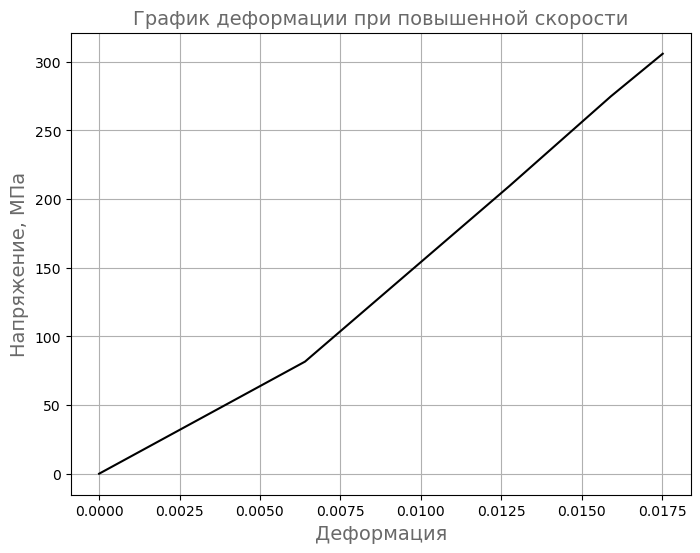

In [176]:
elastic_limit = 0.02 # условно примем, что упругая зона расположена слева от точки 0.02 (2%) по оси деформации
strain_elastic_plastic_p = [0] # пустой список, куда будем записывать упруго-пластические деформации
stress_elastic_plastic_p = [0] # пустой список, куда будем записывать упруго-пластические напряжения

for i in range(1, len(epsilon_true)):
    if epsilon_true_p[i] <= elastic_limit:
        strain_elastic_plastic_p.append(epsilon_true_p[i])
        stress_elastic_plastic_p.append(sigma_true_p[i])
    else: break

# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (strain_elastic_plastic_p, stress_elastic_plastic_p, '-', color = 'black')
# Добавляем названия осей
plt.title ('График деформации при повышенной скорости',fontsize = 14, color='dimgrey')
plt.xlabel ('Деформация', fontsize = 14, color='dimgrey')
plt.ylabel ('Напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid()

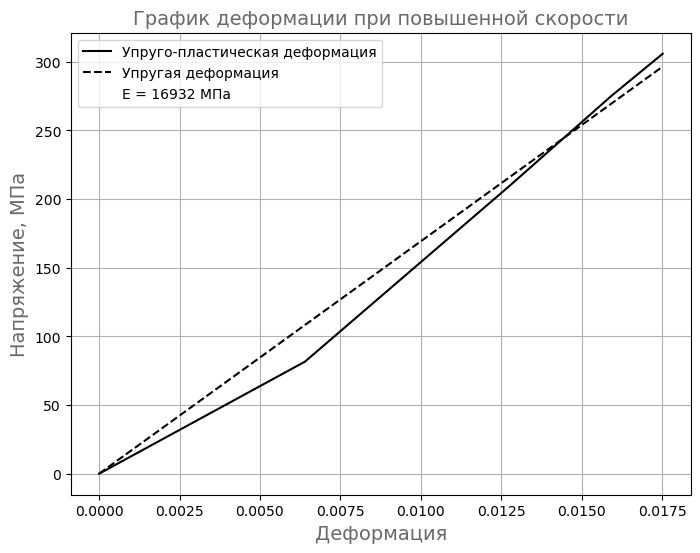

In [177]:
# Определяем график упругой деформации
stress_elastic_p = [0]
strain_elastic_p = [0]
i=0
while epsilon_true_p[i] <= elastic_limit:
    strain_elastic_p.append(epsilon_true_p[i])
    stress_elastic_p.append(E*epsilon_true_p[i])
    i+=1
# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (strain_elastic_plastic_p, stress_elastic_plastic_p, '-', color = 'black', label = 'Упруго-пластическая деформация')
plt.plot (strain_elastic_p, stress_elastic_p, '--', color = 'black', label = 'Упругая деформация')
plt.plot ([], [], ' ', label = f'E = {round(E)} МПа')
# Добавляем названия осей
plt.title ('График деформации при повышенной скорости',fontsize = 14, color='dimgrey')
plt.xlabel ('Деформация', fontsize = 14, color='dimgrey')
plt.ylabel ('Напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid()
# добавляем название каждой кривой
plt.legend()

In [178]:
# Предел текучести материала ищем из расчета, что остаточная пластическая деформацию в этой точке равна 0.2% или 0.002
yield_stress_p = 0
plastic_strain_p = 0
i=0
while plastic_strain_p<=elastic_limit:
    plastic_strain_p = epsilon_true_p[i] - sigma_true_p[i]/E
    yield_stress_p = sigma_true_p[i]
    i+=1
    i_ps=i

print (f'Предел текучести = {yield_stress_p} МПа')
print(f'Номер элемента {i_ps}')

Предел текучести = 412.7397911369411 МПа
Номер элемента 19


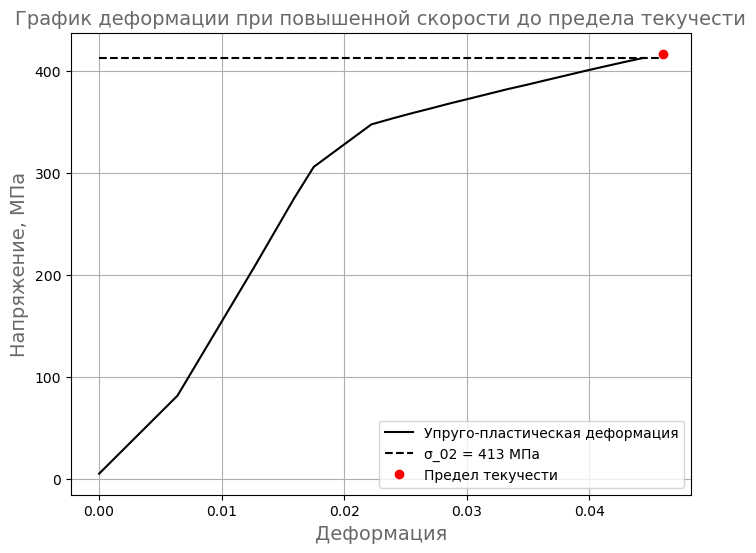

In [179]:
# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (epsilon_true_p[0:i], sigma_true_p[0:i], '-', color = 'black', label = 'Упруго-пластическая деформация')
plt.plot ([epsilon_true_p[0], epsilon_true_p[i]], [yield_stress_p, yield_stress_p], '--', color = 'black', label = f'σ_02 = {round(yield_stress_p)} МПа')
plt.plot(epsilon_true_p[19], sigma_true_p[19], 'ro',markersize=6,label='Предел текучести')
plt.plot
# Добавляем названия осей
plt.title ('График деформации при повышенной скорости до предела текучести',fontsize = 14, color='dimgrey')
plt.xlabel ('Деформация', fontsize = 14, color='dimgrey')
plt.ylabel ('Напряжение, МПа', fontsize = 14, color='dimgrey')
# добавляем сетку
plt.grid()
# добавляем название каждой кривой
plt.legend()